# Exploratory Data Analysis

1) Importing useful libraries and loading the data

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import ttest_ind, pearsonr, f_oneway
from pandas.core.interchange.dataframe_protocol import DataFrame

path_to_dataset = 'dataset/data_v2_full.csv'
df = pd.read_csv(path_to_dataset, sep=';')
df.head()

date            entry               rlm  \
0  2016-01-01 00:00:00+00:00  4501250,1193932  2565525,63955716   
1  2016-01-02 00:00:00+00:00  5448036,5883176  3037878,84001258   
2  2016-01-03 00:00:00+00:00  6472305,1643964  3462335,63317042   
3  2016-01-04 00:00:00+00:00  7766597,9674446  4565145,52259168   
4  2016-01-05 00:00:00+00:00  7842384,7640766   4672447,1254139   

                slp  day_of_year  day_of_week  holiday  weathercode  \
0  1935724,47983604            1            4        1            3   
1  2410157,74830502            2            5        0            3   
2  3009969,53122598            3            6        0            3   
3  3201452,44485292            4            0        0            3   
4   3169937,6386627            5            1        0           73   

   temperature_2m_max  temperature_2m_min  ...  daylight_duration  \
0                 4.3                 0.1  ...           27973.34   
1                 2.5                -5.3  ...           28047.14   
2                -5.4                -8.4  ...           28127.21   
3                -3.5                -7.9  ...           28213.34   
4                -5.2                -6.4  ...           28305.35   

   sunshine_duration  rain_sum  snowfall_sum  precipitation_hours  \
0           17706.46       0.0          0.00                  0.0   
1            2501.06       0.0          0.00                  0.0   
2           21285.25       0.0          0.00                  0.0   
3            9701.30       0.0          0.00                  0.0   
4               0.00       0.0          2.45                 14.0   

   windspeed_10m_max  windgusts_10m_max  winddirection_10m_dominant  \
0                9.0               18.4                         208   
1               24.0               48.2                          97   
2               21.5               44.3                         102   
3               18.9               39.2                          97   
4               16.2               33.5                          84   

   shortwave_radiation_sum  et0_fao_evapotranspiration  
0                     2.64                        0.21  
1                     1.34                        0.50  
2                     3.38                        0.68  
3                     2.47                        0.61  
4                     1.00                        0.46  

[5 rows x 26 columns]

2) Checking for shape and data types

In [59]:
shape = df.shape
types = df.dtypes
print(f"Dataset shape is {shape}")
print(f"Data types for each column:\n{types}")

Dataset shape is (3560, 26)
Data types for each column:
date                           object
entry                          object
rlm                            object
slp                            object
day_of_year                     int64
day_of_week                     int64
holiday                         int64
weathercode                     int64
temperature_2m_max            float64
temperature_2m_min            float64
temperature_2m_mean           float64
apparent_temperature_max      float64
apparent_temperature_min      float64
apparent_temperature_mean     float64
sunrise                         int64
sunset                          int64
daylight_duration             float64
sunshine_duration             float64
rain_sum                      float64
snowfall_sum                  float64
precipitation_hours           float64
windspeed_10m_max             float64
windgusts_10m_max             float64
winddirection_10m_dominant      int64
shortwave_radiation_sum       fl

3) Converting the some features to the right datatypes and renaming consumptions for better clarity

In [60]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date'] = df['date'].dt.tz_localize(None)
df['entry'] = pd.to_numeric(df['entry'].astype(str).str.replace(',', '.'), errors='coerce')
df['slp']   = pd.to_numeric(df['slp'].astype(str).str.replace(',', '.'), errors='coerce')
df['rlm']   = pd.to_numeric(df['rlm'].astype(str).str.replace(',', '.'), errors='coerce')

# useful renames
df = df.rename(columns={'rlm': 'Industrial (RLM)', 'slp': 'Residential (SLP)'})
df.head()

date         entry  Industrial (RLM)  Residential (SLP)  day_of_year  \
0 2016-01-01  4.501250e+06      2.565526e+06       1.935724e+06            1   
1 2016-01-02  5.448037e+06      3.037879e+06       2.410158e+06            2   
2 2016-01-03  6.472305e+06      3.462336e+06       3.009970e+06            3   
3 2016-01-04  7.766598e+06      4.565146e+06       3.201452e+06            4   
4 2016-01-05  7.842385e+06      4.672447e+06       3.169938e+06            5   

   day_of_week  holiday  weathercode  temperature_2m_max  temperature_2m_min  \
0            4        1            3                 4.3                 0.1   
1            5        0            3                 2.5                -5.3   
2            6        0            3                -5.4                -8.4   
3            0        0            3                -3.5                -7.9   
4            1        0           73                -5.2                -6.4   

   ...  daylight_duration  sunshine_duration  rain_sum  snowfall_sum  \
0  ...           27973.34           17706.46       0.0          0.00   
1  ...           28047.14            2501.06       0.0          0.00   
2  ...           28127.21           21285.25       0.0          0.00   
3  ...           28213.34            9701.30       0.0          0.00   
4  ...           28305.35               0.00       0.0          2.45   

   precipitation_hours  windspeed_10m_max  windgusts_10m_max  \
0                  0.0                9.0               18.4   
1                  0.0               24.0               48.2   
2                  0.0               21.5               44.3   
3                  0.0               18.9               39.2   
4                 14.0               16.2               33.5   

   winddirection_10m_dominant  shortwave_radiation_sum  \
0                         208                     2.64   
1                          97                     1.34   
2                         102                     3.38   
3                          97                     2.47   
4                          84                     1.00   

   et0_fao_evapotranspiration  
0                        0.21  
1                        0.50  
2                        0.68  
3                        0.61  
4                        0.46  

[5 rows x 26 columns]

4) Printing a summary of the loaded dataset

In [61]:
def column_summary(df: DataFrame) -> DataFrame:
    summary_data = []
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()

        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_count': distinct_values_counts
        })

    summary_df = pd.DataFrame(summary_data)
    return summary_df

summary_df = column_summary(df)
display(summary_df)

col_name       col_dtype  num_of_nulls  \
0                         date  datetime64[ns]             0   
1                        entry         float64             0   
2             Industrial (RLM)         float64             0   
3            Residential (SLP)         float64             0   
4                  day_of_year           int64             0   
5                  day_of_week           int64             0   
6                      holiday           int64             0   
7                  weathercode           int64             0   
8           temperature_2m_max         float64             0   
9           temperature_2m_min         float64             0   
10         temperature_2m_mean         float64             0   
11    apparent_temperature_max         float64             0   
12    apparent_temperature_min         float64             0   
13   apparent_temperature_mean         float64             0   
14                     sunrise           int64             0   
15                      sunset           int64             0   
16           daylight_duration         float64             0   
17           sunshine_duration         float64             0   
18                    rain_sum         float64             0   
19                snowfall_sum         float64             0   
20         precipitation_hours         float64             0   
21           windspeed_10m_max         float64             0   
22           windgusts_10m_max         float64             0   
23  winddirection_10m_dominant           int64             0   
24     shortwave_radiation_sum         float64             0   
25  et0_fao_evapotranspiration         float64             0   

    num_of_non_nulls  num_of_distinct_values  \
0               3560                    3560   
1               3560                    3560   
2               3560                    3560   
3               3560                    3560   
4               3560                     366   
5               3560                       7   
6               3560                       2   
7               3560                      13   
8               3560                     377   
9               3560                     313   
10              3560                     342   
11              3560                     436   
12              3560                     369   
13              3560                     396   
14              3560                     275   
15              3560                     281   
16              3560                    3555   
17              3560                    3169   
18              3560                     172   
19              3560                      49   
20              3560                      25   
21              3560                     319   
22              3560                     200   
23              3560                     360   
24              3560                    1903   
25              3560                     588   

                                distinct_values_count  
0   {2016-01-01 00:00:00: 1, 2016-01-02 00:00:00: ...  
1   {4501250.1193932: 1, 5448036.5883176: 1, 64723...  
2   {2565525.63955716: 1, 3037878.84001258: 1, 346...  
3   {1935724.47983604: 1, 2410157.74830502: 1, 300...  
4   {273: 10, 32: 10, 31: 10, 30: 10, 29: 10, 28: ...  
5   {4: 509, 5: 509, 6: 509, 0: 509, 1: 509, 3: 50...  
6                                   {0: 3380, 1: 180}  
7   {3: 1280, 51: 807, 53: 400, 61: 264, 55: 154, ...  
8   {22.9: 30, 21.9: 24, 15.2: 22, 21.8: 22, 11.7:...  
9   {14.4: 33, 5.2: 27, 1.0: 27, 15.6: 27, 12.0: 2...  
10  {6.2: 27, 18.1: 27, 10.6: 24, 16.3: 23, 6.3: 2...  
11  {5.3: 22, 19.4: 20, 22.4: 20, 6.5: 19, 16.3: 1...  
12  {-2.1: 28, -0.6: 26, 0.6: 26, -1.9: 25, 1.8: 2...  
13  {0.9: 27, 2.7: 26, 4.4: 24, 0.3: 23, 3.4: 22, ...  
14  {10020: 93, 26340: 79, 10080: 49, 26400: 42, 2...  
15  {53760: 97, 70560: 81, 70500: 66, 53820: 44, 7...  
16  {60500.55: 3, 60481.17: 2, 27671.66: 2, 

5) Exploring statistics for every column

In [62]:
df.describe()

date         entry  Industrial (RLM)  \
count                           3560  3.560000e+03      3.560000e+03   
mean   2020-11-14 13:27:22.247191296  3.163998e+06      2.175805e+06   
min              2016-01-01 00:00:00  3.025428e+05      1.159796e+05   
25%              2018-06-08 18:00:00  2.073326e+06      1.681133e+06   
50%              2020-11-14 12:00:00  2.913396e+06      2.099141e+06   
75%              2023-04-23 06:00:00  4.313723e+06      2.807575e+06   
max              2025-09-30 00:00:00  8.119615e+06      5.201326e+06   
std                              NaN  1.574189e+06      9.379888e+05   

       Residential (SLP)  day_of_year  day_of_week      holiday  weathercode  \
count       3.560000e+03  3560.000000  3560.000000  3560.000000  3560.000000   
mean        9.881924e+05   179.662079     3.000562     0.050562    33.560955   
min        -4.351716e+05     1.000000     0.000000     0.000000     0.000000   
25%         2.548462e+05    90.000000     1.000000     0.000000     3.000000   
50%         8.101641e+05   179.000000     3.000000     0.000000    51.000000   
75%         1.627962e+06   268.000000     5.000000     0.000000    53.000000   
max         3.341411e+06   366.000000     6.000000     1.000000    75.000000   
std         7.521075e+05   104.396440     2.000983     0.219132    27.223750   

       temperature_2m_max  temperature_2m_min  ...  daylight_duration  \
count         3560.000000         3560.000000  ...        3560.000000   
mean            14.928006            7.235309  ...       44506.771744   
min             -6.700000          -17.500000  ...       27607.040000   
25%              8.100000            1.900000  ...       33855.352500   
50%             14.950000            7.100000  ...       44880.770000   
75%             21.800000           12.900000  ...       55210.185000   
max             36.100000           23.100000  ...       60523.940000   
std              8.401043            6.700360  ...       11157.694989   

       sunshine_duration     rain_sum  snowfall_sum  precipitation_hours  \
count        3560.000000  3560.000000   3560.000000          3560.000000   
mean        27306.354107     1.580506      0.062253             3.681742   
min             0.000000     0.000000      0.000000             0.000000   
25%         12841.062500     0.000000      0.000000             0.000000   
50%         28599.000000     0.100000      0.000000             1.000000   
75%         42401.360000     1.700000      0.000000             6.000000   
max         55333.020000    39.200000      9.660000            24.000000   
std         17105.955470     3.321599      0.387176             4.824554   

       windspeed_10m_max  windgusts_10m_max  winddirection_10m_dominant  \
count        3560.000000        3560.000000                 3560.000000   
mean           17.427612          35.502331                  204.194101   
min             3.900000          10.800000                    0.000000   
25%            12.800000          26.300000                  130.000000   
50%            16.300000          33.500000                  228.000000   
75%            21.200000          42.800000                  270.000000   
max            57.000000         110.500000                  360.000000   
std             6.273484          12.865812                   88.948244   

       shortwave_radiation_sum  et0_fao_evapotranspiration  
count              3560.000000                 3560.000000  
mean                 11.427919                    2.170975  
min                   0.300000                    0.100000  
25%                   3.830000                    0.700000  
50%                  10.425000                    1.845000  
75%                  18.175000                    3.440000  
max                  29.230000                    8.020000  
std                   7.919195                    1.615968  

[8 rows x 26 columns]

6) Useful plots

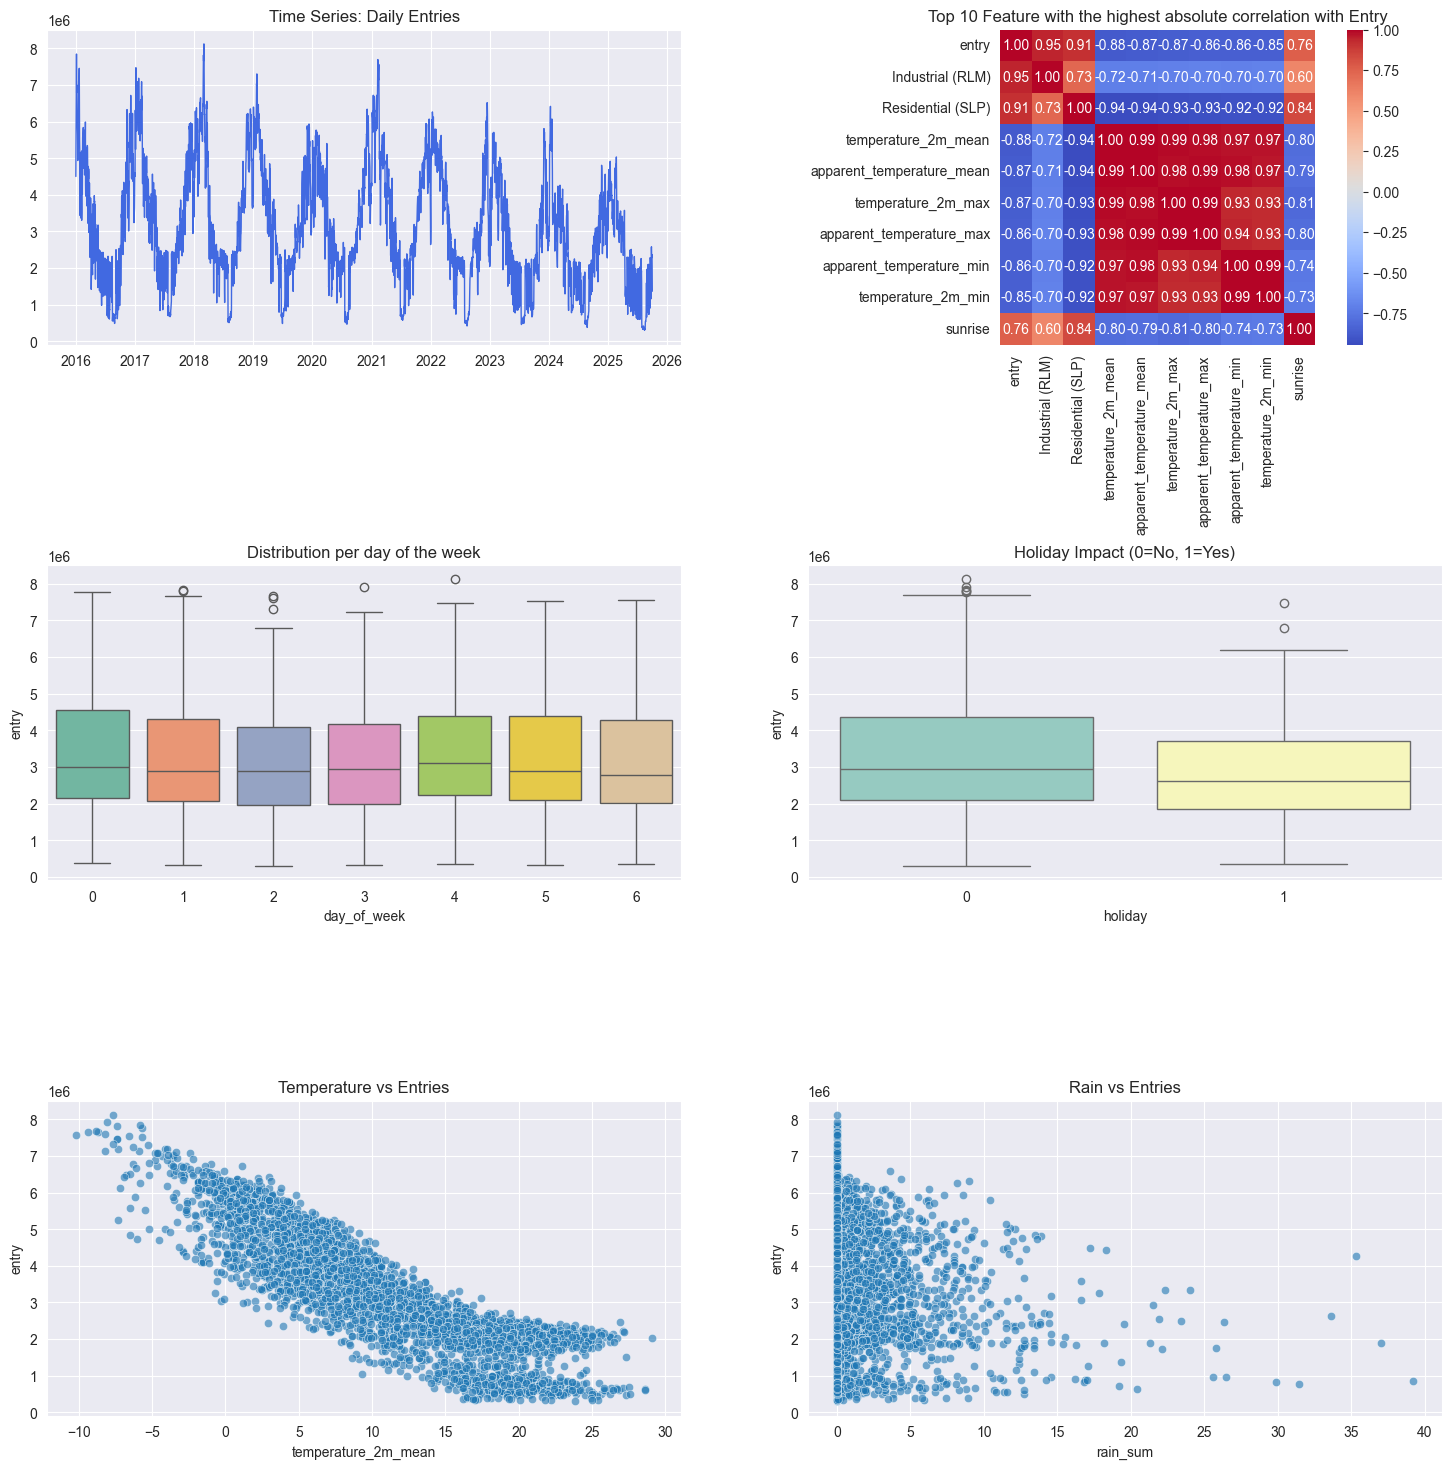

In [63]:
# Plot Configuration
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
plt.subplots_adjust(hspace=0.7)

# Time series
axes[0, 0].plot(df['date'], df['entry'], color='royalblue', linewidth=1)
axes[0, 0].set_title('Time Series: Daily Entries')

# Correlation matrix (Top 10 Features)
corr_matrix = df.corr(numeric_only=True)
k = 10 # Number of features to show
cols = corr_matrix['entry'].abs().nlargest(k).index
cm = np.corrcoef(df[cols].values.T)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
            yticklabels=cols.values, xticklabels=cols.values, ax=axes[0, 1], cmap='coolwarm')
axes[0, 1].set_title('Top 10 Feature with the highest absolute correlation with Entry')

# Weekly Analysis
sns.boxplot(x='day_of_week', y='entry', data=df, ax=axes[1, 0], hue='day_of_week', palette='Set2', legend=False)
axes[1, 0].set_title('Distribution per day of the week')

# Holiday Analysis
sns.boxplot(x='holiday', y='entry', data=df, ax=axes[1, 1], hue='holiday', palette='Set3', legend=False)
axes[1, 1].set_title('Holiday Impact (0=No, 1=Yes)')

# Scatter Plot Temperature (most relevant feature)
sns.scatterplot(x='temperature_2m_mean', y='entry', data=df, ax=axes[2, 0], alpha=0.6)
axes[2, 0].set_title('Temperature vs Entries')

# Scatter Plot Rain
sns.scatterplot(x='rain_sum', y='entry', data=df, ax=axes[2, 1], alpha=0.6)
axes[2, 1].set_title('Rain vs Entries')

plt.show()

7) Some Statistical Tests

In [64]:
# Statistical Tests -> work in progress (implementing more tests like ANOVA)
# wip: weekend and non weekend analysis
# T-Test: Is there a significant difference between holidays and non-holidays?
holiday = df[df['holiday'] == 1]['entry']
non_holiday = df[df['holiday'] == 0]['entry']
t_stat, p_val_holiday = ttest_ind(non_holiday, holiday, equal_var=False)

print(f"T-test Holydays vs Non-Holydays: P-value={p_val_holiday:.4f}")
# If P-value < 0.05, the difference is significant.

# Correlation Temperature
corr_temp, p_val_temp = pearsonr(df['temperature_2m_mean'], df['entry'])
print(f"Correlation Temp-Entry: {corr_temp:.2f} (P-value={p_val_temp:.4f})")

T-test Holydays vs Non-Holydays: P-value=0.0001
Correlation Temp-Entry: -0.88 (P-value=0.0000)


8) Other plots

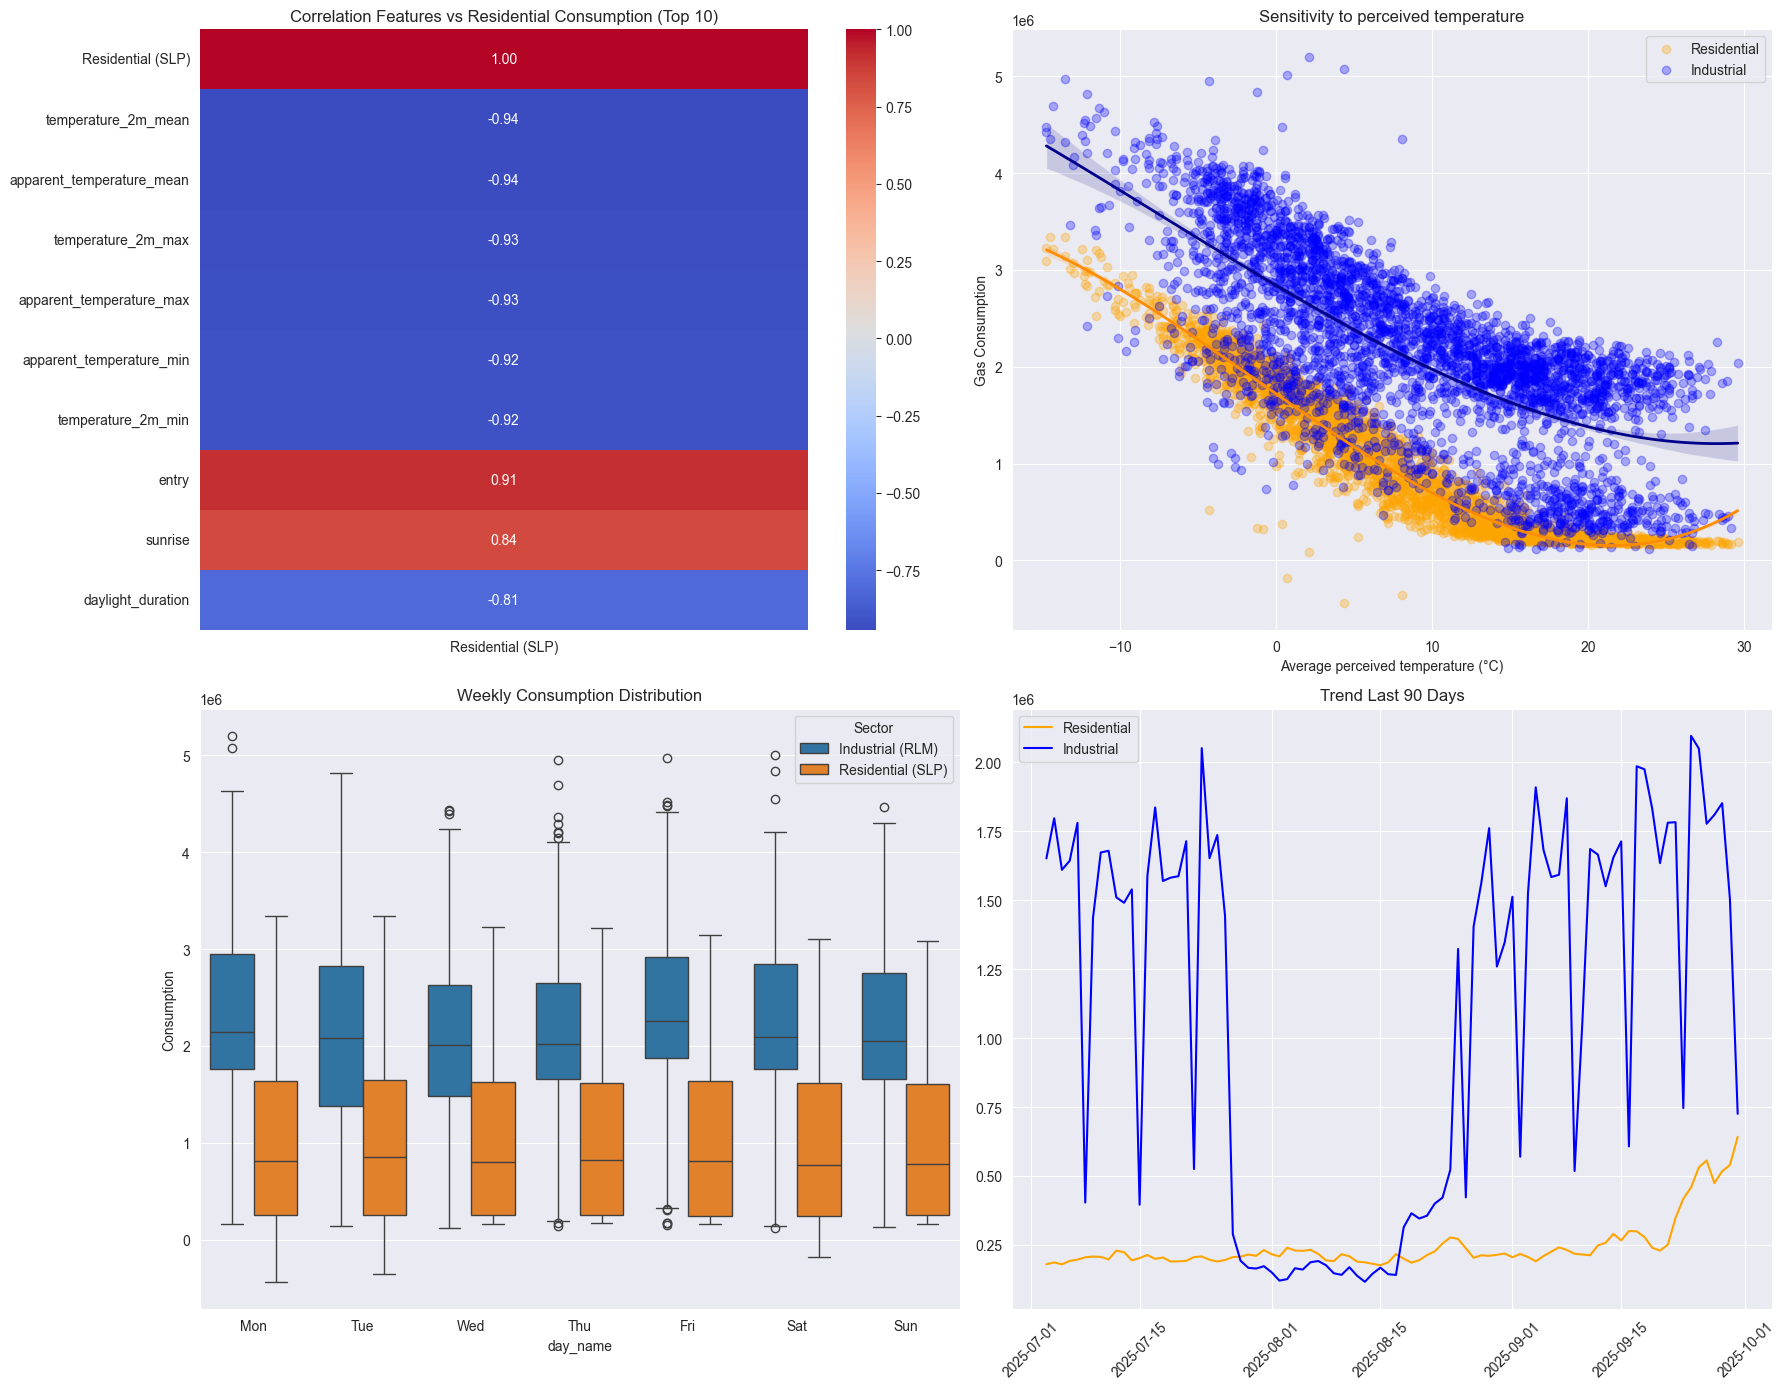

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Heatmap with the top 10 features correlated to the target -> SLP
corr_matrix = df.corr(numeric_only=True)
top_features = corr_matrix['Residential (SLP)'].abs().sort_values(ascending=False).head(10).index
sns.heatmap(df[top_features].corr()[['Residential (SLP)']], annot=True, fmt='.2f', cmap='coolwarm', ax=axes[0,0])
axes[0,0].set_title('Correlation Features vs Residential Consumption (Top 10)')

# Industrial vs residential -> sensitivity analysis
# Scatter plot -> who consumes more with the cold weather/temperature?
sns.regplot(x='apparent_temperature_mean', y='Residential (SLP)', data=df, ax=axes[0,1],
            label='Residential', color='orange', scatter_kws={'alpha':0.3}, order=3,
            line_kws={'color': 'darkorange', 'linewidth': 2})
sns.regplot(x='apparent_temperature_mean', y='Industrial (RLM)', data=df, ax=axes[0,1],
            label='Industrial', color='blue', scatter_kws={'alpha':0.3}, order=3,
            line_kws={'color': 'darkblue', 'linewidth': 2})
axes[0,1].legend()
axes[0,1].set_title('Sensitivity to perceived temperature')
axes[0,1].set_xlabel('Average perceived temperature (°C)')
axes[0,1].set_ylabel('Gas Consumption')

# Weekly pattern -> boxplot
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['day_name'] = df['day_of_week'].map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'})

df_melt = df.melt(id_vars=['day_name'], value_vars=['Industrial (RLM)', 'Residential (SLP)'],
                  var_name='Sector', value_name='Consumption')

sns.boxplot(x='day_name', y='Consumption', hue='Sector', data=df_melt, order=day_order, ax=axes[1,0])
axes[1,0].set_title('Weekly Consumption Distribution')

# Time Series -> last 3 months/90 days
last_3_months = df[df['date'] > df['date'].max() - pd.Timedelta(days=90)]
axes[1,1].plot(last_3_months['date'], last_3_months['Residential (SLP)'], label='Residential', color='orange')
axes[1,1].plot(last_3_months['date'], last_3_months['Industrial (RLM)'], label='Industrial', color='blue')
axes[1,1].set_title('Trend Last 90 Days')
axes[1,1].legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

9) Other plots -> correlation and time series analysis for every year

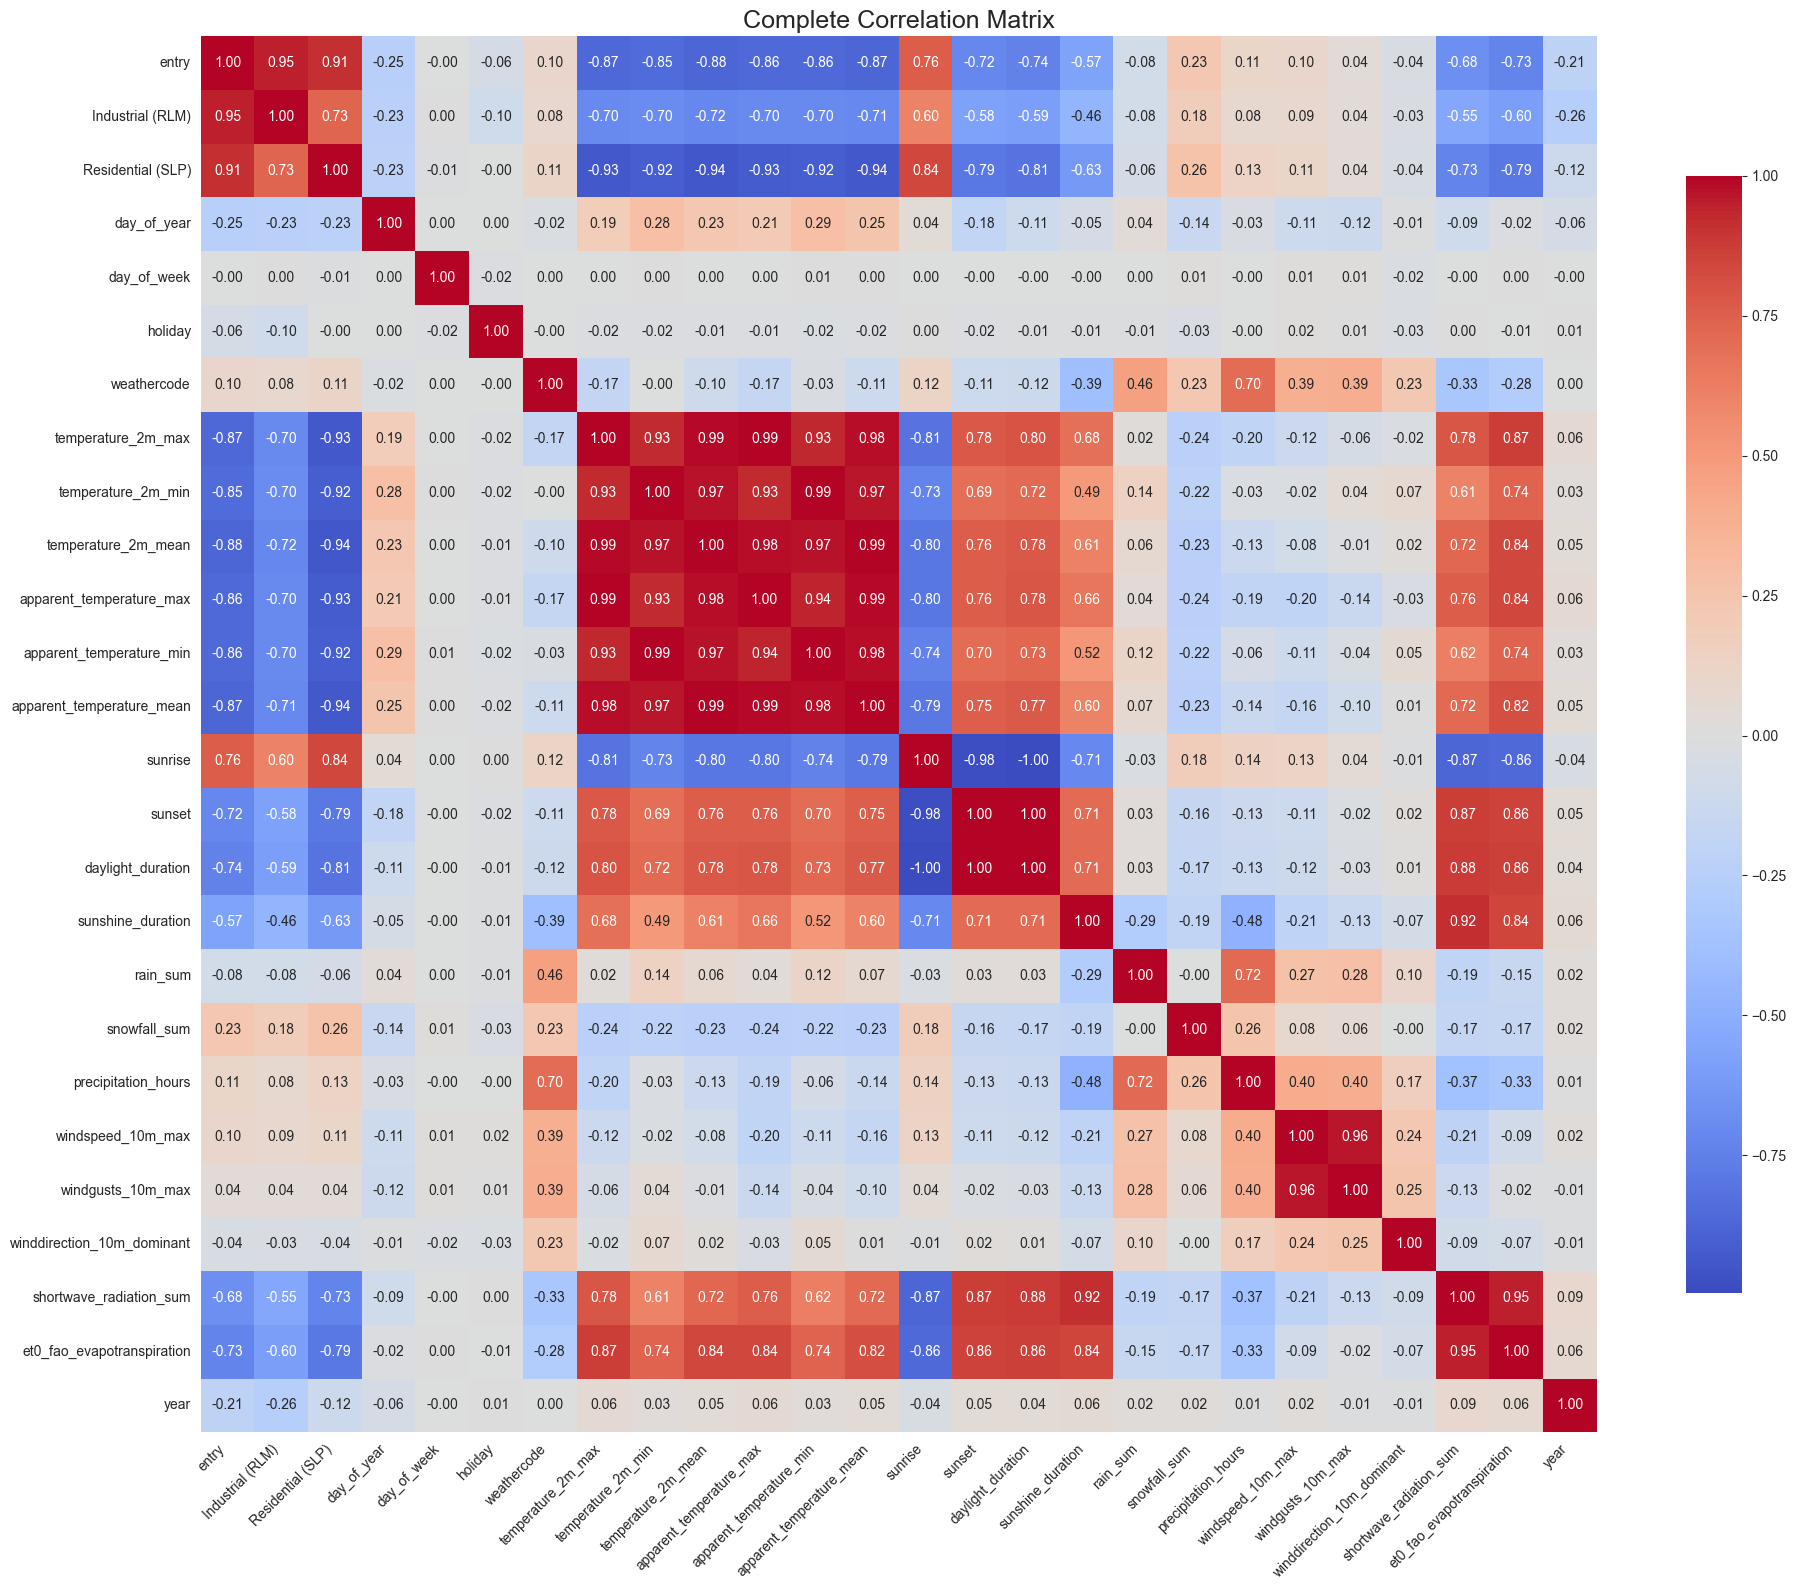

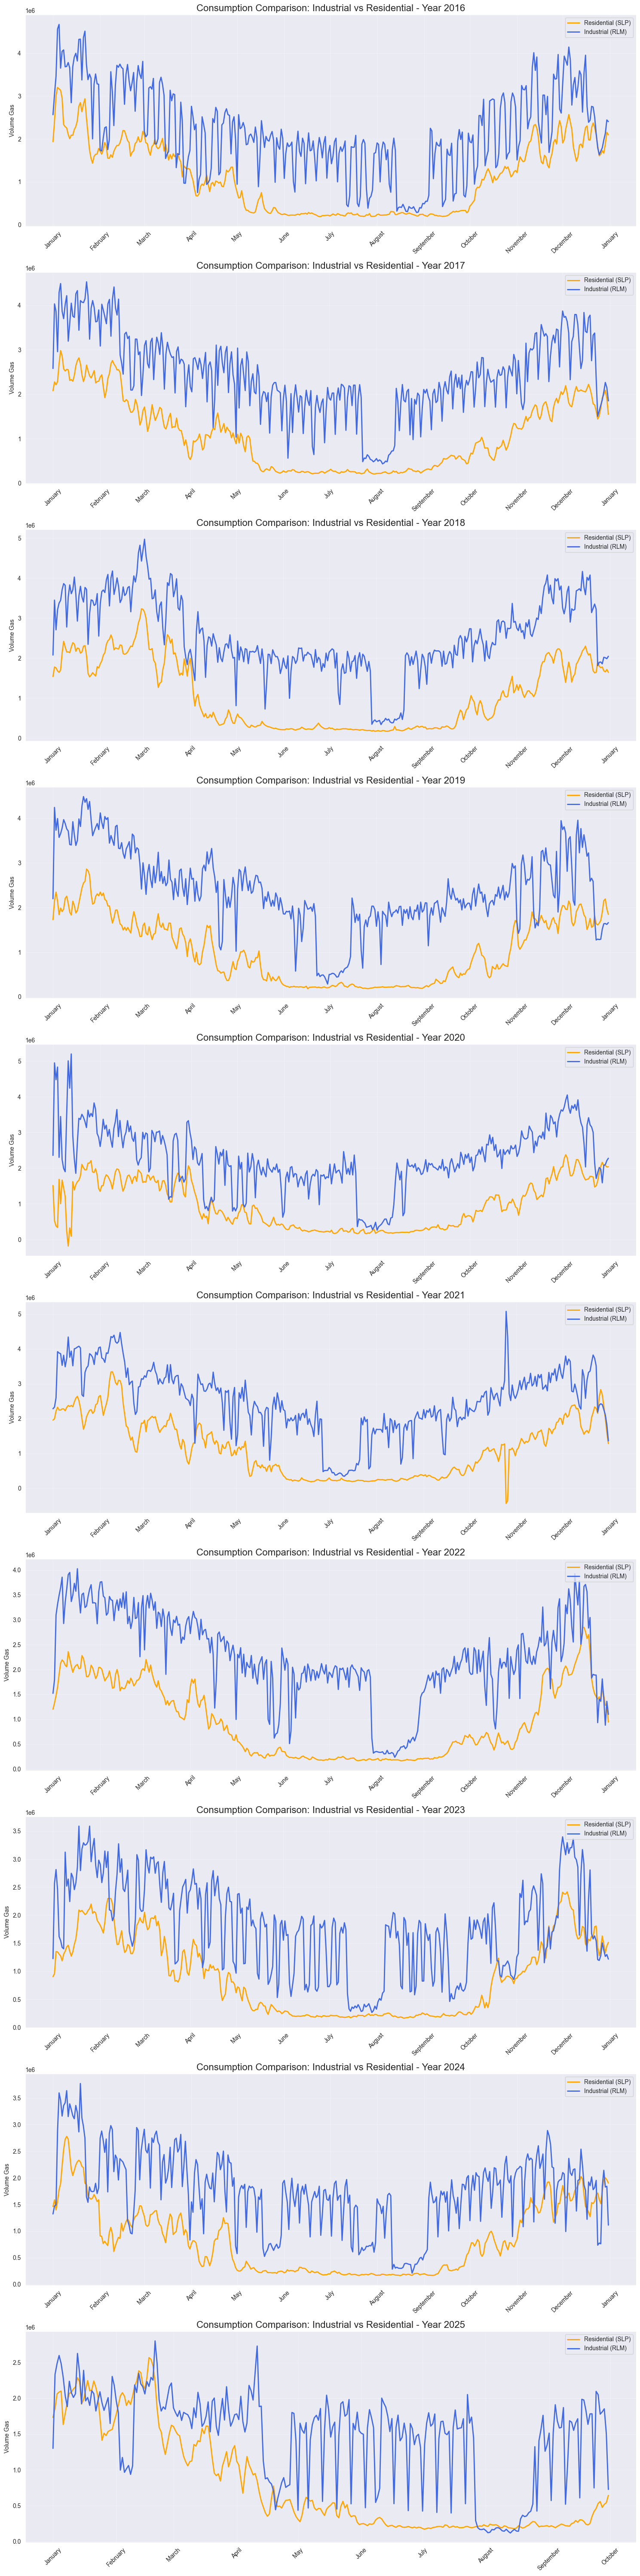

In [66]:
def plot_advanced_eda(df):
    if 'slp' in df.columns:
        col_res = 'slp'
        col_ind = 'rlm'
        label_res = 'Residential (SLP)'
        label_ind = 'Industrial (RLM)'
    elif 'Residential (SLP)' in df.columns:
        col_res = 'Residential (SLP)'
        col_ind = 'Industrial (RLM)'
        label_res = 'Residential (SLP)'
        label_ind = 'Industrial (RLM)'
    else:
        raise KeyError("Column names 'slp'/'rlm' o 'Residential'/'Industrial' not found")

    df = df.copy()
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year

    # Correlation matrix complete
    plt.figure(figsize=(20, 16))
    corr_matrix = df.corr(numeric_only=True)

    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                square=True, cbar_kws={'shrink': .8})
    plt.title('Complete Correlation Matrix', fontsize=18)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Yearly trend plots
    unique_years = sorted(df['year'].unique())
    num_years = len(unique_years)

    fig, axes = plt.subplots(num_years, 1, figsize=(15, 6 * num_years), sharey=False)

    if num_years == 1:
        axes = [axes]

    for i, year in enumerate(unique_years):
        ax = axes[i]
        year_data = df[df['year'] == year]

        # Usa le variabili col_res e col_ind rilevate dinamicamente
        ax.plot(year_data['date'], year_data[col_res], label=label_res, color='orange', linewidth=2)
        ax.plot(year_data['date'], year_data[col_ind], label=label_ind, color='royalblue', linewidth=2)

        ax.set_title(f'Consumption Comparison: Industrial vs Residential - Year {year}', fontsize=16)
        ax.set_ylabel('Volume Gas')
        ax.legend(loc='upper right')

        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_advanced_eda(df)

10) Feature selection (using statistics & correlation) -> SLM as target

In [70]:
def feature_selector(df, target_col, whitelist = None, threshold_collinear=0.90, threshold_low_corr=0.05):
    """
    Perform feature selection removing:
    1. The ones weakly correlated with the target.
    2. The ones highly correlated with each other (keeping the best one wrt the target).

    Args:
        df (pd.DataFrame): The complete dataframe.
        target_col (str): The name of the target column.
        whitelist (list[str], optional): List of feature to keep regardless (from the statistical tests).
        threshold_collinear (float): Threshold above which two features are considered redundant.
        threshold_low_corr (float): Minimum correlation threshold with the target.

    Returns:
        final_features (list): List of selected features ready for the model.
        dropped_low_corr (list): List of features dropped due to low correlation.
        dropped_collinear (list): List of features dropped due to collinearity.
    """
    if whitelist is None: whitelist = []

    corr_matrix = df.corr(numeric_only=True).abs()
    blacklist = [target_col, 'entry', 'Industrial (RLM)', 'date']

    # Candidates Features
    candidates = [c for c in corr_matrix.columns if c != target_col and c not in blacklist]
    initial_count = len(candidates)

    features_to_keep = []
    dropped_low_corr = []
    dropped_collinear = []

    # Removing feature with low correlation with the target
    for feat in candidates:
        if feat in whitelist:
            features_to_keep.append(feat)
            continue
        score = corr_matrix.loc[feat, target_col]
        if score < threshold_low_corr:
            dropped_low_corr.append(f"{feat} ({score:.3f})")
        else:
            features_to_keep.append(feat)

    # Update candidate's list
    #candidates = [c for c in candidates if c not in dropped_low_corr]

    # Removing Multicollinearity
    features_to_keep = sorted(features_to_keep, key=lambda x: corr_matrix.loc[x, target_col], reverse=True)
    final_features = []
    while len(features_to_keep) > 0:
        # Keep the stronger correlation
        best_feat = features_to_keep.pop(0)
        final_features.append(best_feat)

        # Find all the remaining feature too highly correlated with best_feat
        to_remove = []
        for other_feat in features_to_keep:
            if corr_matrix.loc[best_feat, other_feat] > threshold_collinear:
                if other_feat not in whitelist:
                    to_remove.append(other_feat)
                    dropped_collinear.append(f"{other_feat} (similar a {best_feat})")

        # Removing them to the list of candidates
        features_to_keep = [c for c in features_to_keep if c not in to_remove]

    # Output

    print(f"--- REPORT OUTPUT (Target: {target_col}) ---\n")
    print(f"Initial Candidates: {initial_count}\n")
    print(f"Dropped (Low Correlation < {threshold_low_corr}): {dropped_low_corr}): {len(dropped_low_corr)} -> {dropped_low_corr}\n")
    print(f"Dropped (Redundant > {threshold_collinear}): {len(dropped_collinear)} -> {dropped_collinear}\n")
    print(f"Selected Features: {final_features}\n")

    return final_features, dropped_low_corr, dropped_collinear


my_whitelist = ['holiday']  # for the statistical significance
target = 'Residential (SLP)'
feats, low, coll = feature_selector(df, target_col=target, whitelist=my_whitelist)

--- REPORT OUTPUT (Target: Residential (SLP)) ---

Initial Candidates: 22

Dropped (Low Correlation < 0.05): ['day_of_week (0.009)', 'windgusts_10m_max (0.037)', 'winddirection_10m_dominant (0.041)']): 3 -> ['day_of_week (0.009)', 'windgusts_10m_max (0.037)', 'winddirection_10m_dominant (0.041)']

Dropped (Redundant > 0.9): 8 -> ['apparent_temperature_mean (similar a temperature_2m_mean)', 'temperature_2m_max (similar a temperature_2m_mean)', 'apparent_temperature_max (similar a temperature_2m_mean)', 'apparent_temperature_min (similar a temperature_2m_mean)', 'temperature_2m_min (similar a temperature_2m_mean)', 'daylight_duration (similar a sunrise)', 'sunset (similar a sunrise)', 'shortwave_radiation_sum (similar a et0_fao_evapotranspiration)']

Selected Features: ['temperature_2m_mean', 'sunrise', 'et0_fao_evapotranspiration', 'sunshine_duration', 'snowfall_sum', 'day_of_year', 'precipitation_hours', 'weathercode', 'windspeed_10m_max', 'rain_sum', 'holiday']



11) Creating a new dataset with the selected features

In [68]:
cols_to_keep = ['date'] + feats + [target]
df_clean = df[cols_to_keep].copy()

# Setting the date as index (optional)
df_clean = df_clean.set_index('date')

# CHeck
display(df_clean.head())
print(f"\nDataset dimension: {df_clean.shape}")

temperature_2m_mean  sunrise  et0_fao_evapotranspiration  \
date                                                                   
2016-01-01                  2.4    26400                        0.21   
2016-01-02                 -1.5    26340                        0.50   
2016-01-03                 -6.8    26340                        0.68   
2016-01-04                 -5.7    26340                        0.61   
2016-01-05                 -5.8    26340                        0.46   

            sunshine_duration  snowfall_sum  day_of_year  precipitation_hours  \
date                                                                            
2016-01-01           17706.46          0.00            1                  0.0   
2016-01-02            2501.06          0.00            2                  0.0   
2016-01-03           21285.25          0.00            3                  0.0   
2016-01-04            9701.30          0.00            4                  0.0   
2016-01-05               0.00          2.45            5                 14.0   

            weathercode  windspeed_10m_max  rain_sum  holiday  \
date                                                            
2016-01-01            3                9.0       0.0        1   
2016-01-02            3               24.0       0.0        0   
2016-01-03            3               21.5       0.0        0   
2016-01-04            3               18.9       0.0        0   
2016-01-05           73               16.2       0.0        0   

            Residential (SLP)  
date                           
2016-01-01       1.935724e+06  
2016-01-02       2.410158e+06  
2016-01-03       3.009970e+06  
2016-01-04       3.201452e+06  
2016-01-05       3.169938e+06


Dataset dimension: (3560, 12)


12) Some visualizations with PCA and t-SNE

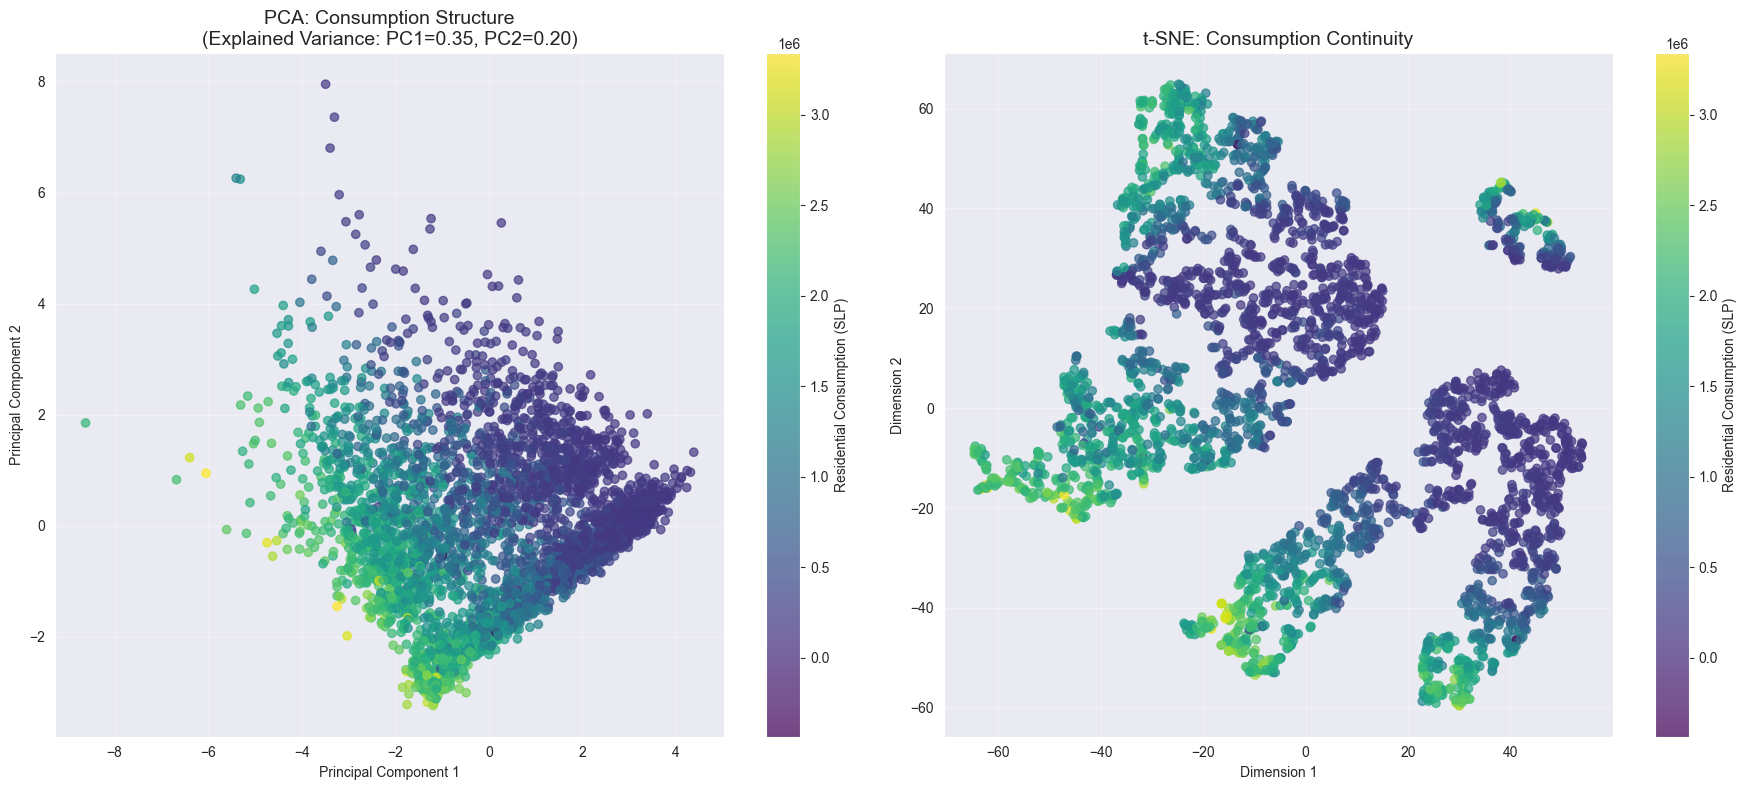

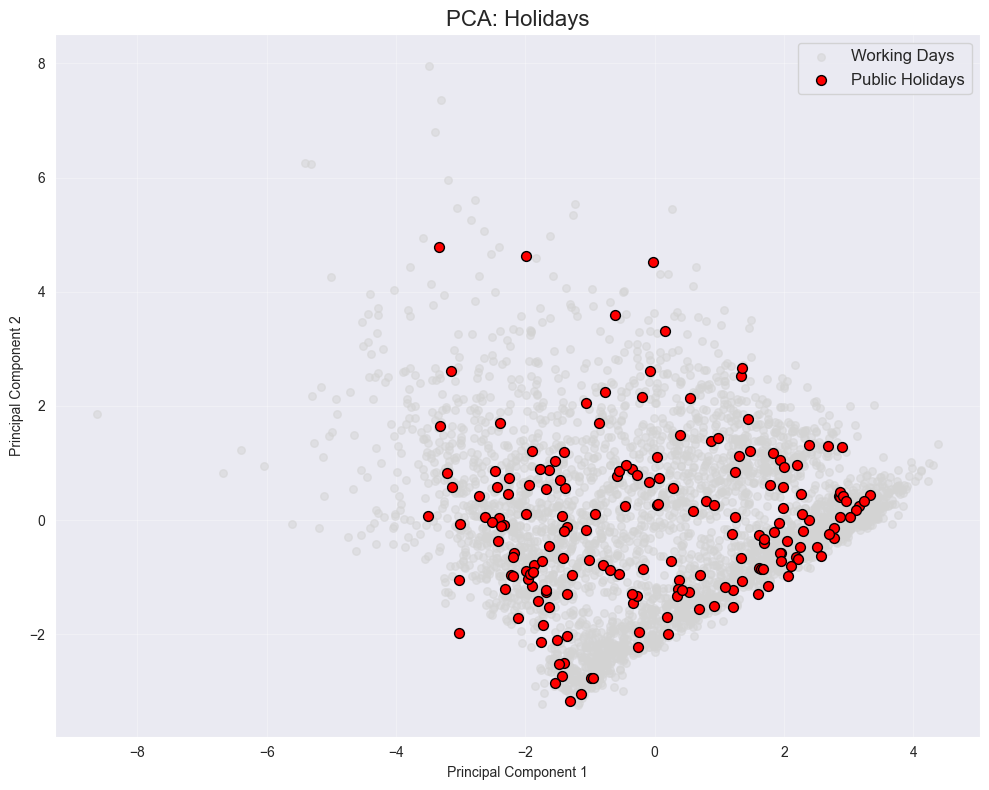


--- PCA coefficients ---
                                 PC1       PC2
temperature_2m_mean         0.379663  0.358736
sunrise                    -0.396528 -0.342693
et0_fao_evapotranspiration  0.453456  0.244551
sunshine_duration           0.448948  0.077986
snowfall_sum               -0.170939  0.025421
day_of_year                 0.031660  0.013200
precipitation_hours        -0.324174  0.453848
weathercode                -0.286196  0.406047
windspeed_10m_max          -0.184234  0.300451
rain_sum                   -0.200687  0.475365
holiday                    -0.002935 -0.008217


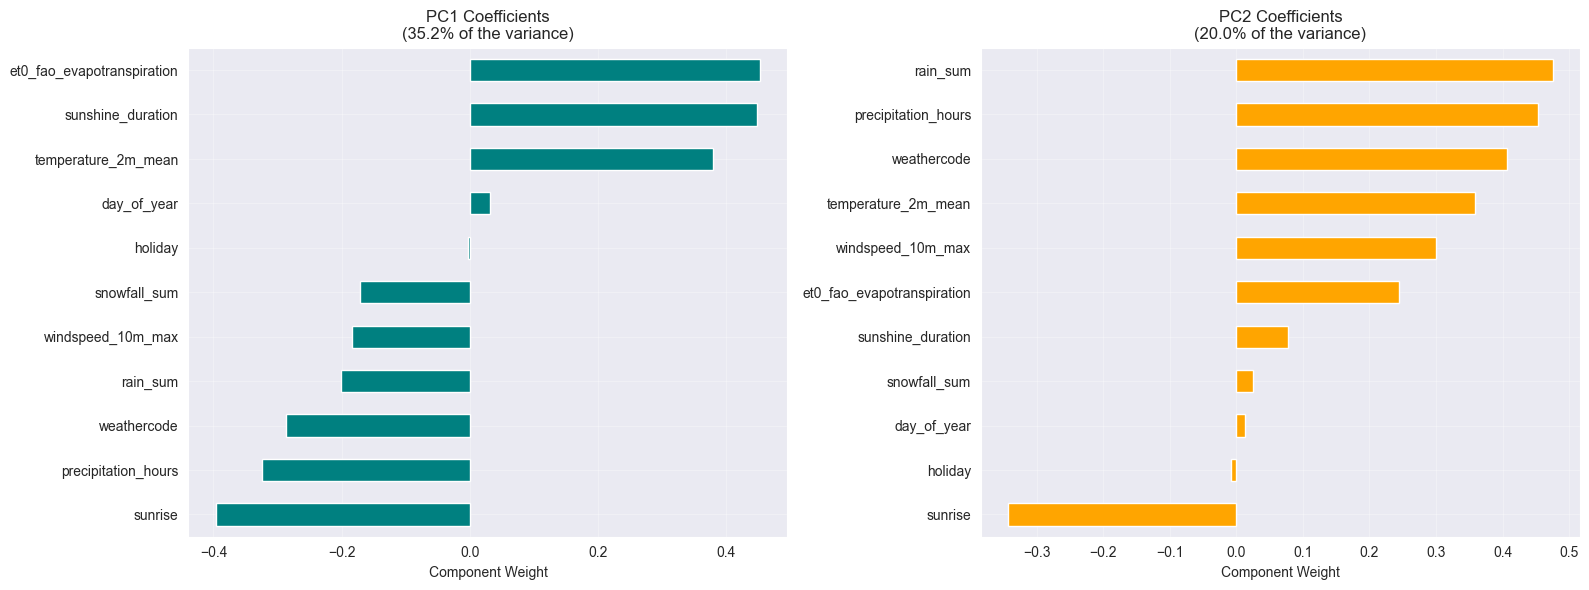

In [69]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


target_col = 'Residential (SLP)'
X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
evr = pca.explained_variance_ratio_ # Explained variance

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# PLots -> PCA and t-SNE colored for the consumption
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# PCA
sc1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
axes[0].set_title(f'PCA: Consumption Structure\n(Explained Variance: PC1={evr[0]:.2f}, PC2={evr[1]:.2f})', fontsize=14)
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
plt.colorbar(sc1, ax=axes[0], label='Residential Consumption (SLP)')
axes[0].grid(True, alpha=0.3)

# t-SNE
sc2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
axes[1].set_title('t-SNE: Consumption Continuity', fontsize=14)
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
plt.colorbar(sc2, ax=axes[1], label='Residential Consumption (SLP)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# PCA: holiday focus
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 8))

mask_holiday = df['holiday'] == 1
mask_workday = df['holiday'] == 0

# Plot Working Days (Gray on the backgorund)
ax2.scatter(X_pca[mask_workday, 0], X_pca[mask_workday, 1],
            c='lightgray', label='Working Days', alpha=0.5, s=30)

# Plot Public Holidays (Red, overlayed)
ax2.scatter(X_pca[mask_holiday, 0], X_pca[mask_holiday, 1],
            c='red', label='Public Holidays', edgecolors='black', s=50)

ax2.set_title('PCA: Holidays', fontsize=16)
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# PCA coefficient analysis
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=X.columns
)

print("\n--- PCA coefficients ---")
print(loadings)

fig_load, ax_load = plt.subplots(1, 2, figsize=(16, 6))

# PC1 Loadings
loadings['PC1'].sort_values().plot(kind='barh', ax=ax_load[0], color='teal')
ax_load[0].set_title(f'PC1 Coefficients\n({evr[0]*100:.1f}% of the variance)')
ax_load[0].set_xlabel('Component Weight')
ax_load[0].grid(True, alpha=0.3)

# PC2 Loadings
loadings['PC2'].sort_values().plot(kind='barh', ax=ax_load[1], color='orange')
ax_load[1].set_title(f'PC2 Coefficients\n({evr[1]*100:.1f}% of the variance)')
ax_load[1].set_xlabel('Component Weight')
ax_load[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()